# Assignment 02 ( Deep neural network )

---

Hyperparameter Setting 1 to 4

---


CSE 4238 - Soft Computing Lab

---


ID : 170104037

---


Sec : A

---


Date : 02/09/2021

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Importing necessary libraries

In [ ]:
import os
from os import path
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

# Task 1
*  Unzipping the dataset
*  ID = 37 , so Dataset C was loaded


In [ ]:
!unzip '/content/gdrive/MyDrive/Colab Notebooks/soft comp/Assingment 2/Dataset C.zip'

Streaming output truncated to the last 5000 lines.
  inflating: training-c/c19299.png   
  inflating: training-c/c19300.png   
  inflating: training-c/c19301.png   
  inflating: training-c/c19302.png   
  inflating: training-c/c19303.png   
  inflating: training-c/c19304.png   
  inflating: training-c/c19305.png   
  inflating: training-c/c19306.png   
  inflating: training-c/c19307.png   
  inflating: training-c/c19308.png   
  inflating: training-c/c19309.png   
  inflating: training-c/c19310.png   
  inflating: training-c/c19311.png   
  inflating: training-c/c19312.png   
  inflating: training-c/c19313.png   
  inflating: training-c/c19314.png   
  inflating: training-c/c19315.png   
  inflating: training-c/c19316.png   
  inflating: training-c/c19317.png   
  inflating: training-c/c19318.png   
  inflating: training-c/c19319.png   
  inflating: training-c/c19320.png   
  inflating: training-c/c19321.png   
  inflating: training-c/c19322.png   
  inflating: training-c/c19323.png   



---

---
**Dropping all the columns except ‘filename’ and ‘digit’ from csv file**


---



---



In [ ]:
c_csv = pd.read_csv('/content/training-c.csv')
print(c_csv.columns)
csv_file = c_csv[['filename', 'digit']]

csv_file.to_csv('Dataset.csv',index=False)


Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')


In [ ]:
dataset_csv = pd.read_csv('Dataset.csv')
dataset_csv.head() #First 5 Rows of the CSV File

,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7




---



---


# Preparing the dataset for future training


---



In [ ]:

class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

TRAIN_PATH = '/content/training-c'
dataset  = Dataset(dataset_csv, TRAIN_PATH, train_transform)

print("Trainig Samples: ",len(dataset))

Trainig Samples:  24298


#An example of training data

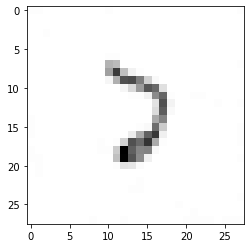

In [ ]:
show_img = dataset[1][0].numpy().reshape(28,28)
plt.imshow(show_img, cmap = 'gray')

---

---


# Task 2


*   Experiment 01 




---



---



#Hyperparameter Setting 1
*   No of hidden layers = 6
*   Hidden Nodes = 200
*   Iteration = 20000
*   Learning rate = 0.01
*   Batch size = 20
*   Number of epoch = 21
*   Activation Function : ReLU, PReLU, ReLU6
*   Optimizer : SGD
*   Accuracy : 10.35%
*   Loss : 2.30


In [ ]:
batch_size = 20
num_iters = 20500  #till 20000
input_dim = 28*28 
output_dim = 10
learning_rate = 0.01
num_hidden = 200  #number of hidden nodes
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# split data 20% for testing
test_size = int(0.2*len(dataset))
train_size = len(dataset)-test_size

train_data, test_data = torch.utils.data.random_split(dataset,[train_size,test_size])

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    shuffle =True )

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    shuffle = False)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:972
Test dataloader:243


In [ ]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

21





---


*   Lenght of train data
*   Lenght of test data
*   Shape of an image



---





In [ ]:
print(len(train_data))
print(len(test_data))
print(train_data[0][0].shape)

19439
4859
torch.Size([1, 28, 28])


In [ ]:
#1
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 200
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 200 --> 200
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.PReLU()

        ### 3rd hidden layer: 200 --> 200
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU6()

        ### 4th hidden layer: 200 --> 200
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 4th hidden layer
        self.relu_4 = nn.PReLU()

        ### 5th hidden layer: 200 --> 200
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 5th hidden layer
        self.relu_5 = nn.PReLU()

        ### 6th hidden layer: 200 --> 200
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 6th hidden layer
        self.relu_6 = nn.PReLU()

        ### Output layer: 200 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ## Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ## Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ## Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ## Non-linearity in 6th hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
#1
'''
INSTANTIATE MODEL CLASS
'''
model = DeepNeuralNetworkModel(input_size=input_dim,
                                num_classes=output_dim,
                                num_hidden = num_hidden)

#To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): PReLU(num_parameters=1)
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU6()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): PReLU(num_parameters=1)
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): PReLU(num_parameters=1)
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): PReLU(num_parameters=1)
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)



---



*   Optimizer = SGD



---



In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [ ]:
#1
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.313260316848755. Accuracy: 9.240584482403786
Iteration: 1000. Loss: 2.308323621749878. Accuracy: 9.240584482403786
Iteration: 1500. Loss: 2.3028056621551514. Accuracy: 9.240584482403786
Iteration: 2000. Loss: 2.2961440086364746. Accuracy: 9.240584482403786
Iteration: 2500. Loss: 2.3020522594451904. Accuracy: 11.48384441243054
Iteration: 3000. Loss: 2.304255723953247. Accuracy: 9.240584482403786
Iteration: 3500. Loss: 2.2996857166290283. Accuracy: 9.30232558139535
Iteration: 4000. Loss: 2.306485652923584. Accuracy: 9.240584482403786
Iteration: 4500. Loss: 2.3088560104370117. Accuracy: 12.471701996295534
Iteration: 5000. Loss: 2.306365966796875. Accuracy: 11.257460382794815
Iteration: 5500. Loss: 2.3040032386779785. Accuracy: 9.220004116073266
Iteration: 6000. Loss: 2.3045942783355713. Accuracy: 9.240584482403786
Iteration: 6500. Loss: 2.3123581409454346. Accuracy: 9.240584482403786
Iteration: 7000. Loss: 2.302083969116211. Accuracy: 9.240584482403786
Iteration: 7

---

# Loss vs Iteration graph

---



[2.313260316848755, 2.308323621749878, 2.3028056621551514, 2.2961440086364746, 2.3020522594451904, 2.304255723953247, 2.2996857166290283, 2.306485652923584, 2.3088560104370117, 2.306365966796875, 2.3040032386779785, 2.3045942783355713, 2.3123581409454346, 2.302083969116211, 2.3018805980682373, 2.2967607975006104, 2.302570104598999, 2.3008670806884766, 2.295905113220215, 2.3005011081695557, 2.302858829498291, 2.3008759021759033, 2.2979750633239746, 2.30973219871521, 2.3001434803009033, 2.300576686859131, 2.301241397857666, 2.3104119300842285, 2.301772117614746, 2.3026657104492188, 2.3068530559539795, 2.300192356109619, 2.3035624027252197, 2.304011106491089, 2.301750898361206, 2.3132081031799316, 2.3008739948272705, 2.3026833534240723, 2.301117181777954, 2.3026058673858643]


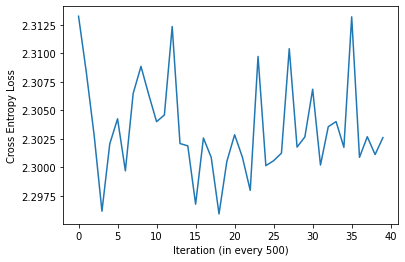

In [ ]:
#1
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
root_path = '/content/gdrive/MyDrive/Colab Notebooks/soft comp/Assingment 2/'

save_model = True

if save_model is True:
    # Saves only parameters
    # weights & biases
    torch.save(model.state_dict(), root_path + 'Setting_1.pkl') 

# Prediction for Experiment 1


*  Loading the model of experiment 01
*  Plotting first 5 images
*  Predict the labels



Trained Model Loaded


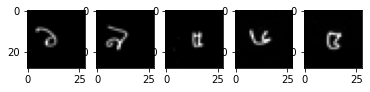

Predicted labels [2 2 7 2 7]


In [ ]:
#Load model
root_path = '/content/gdrive/MyDrive/Colab Notebooks/soft comp/Assingment 2/'
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Setting_1.pkl'))
    print('Trained Model Loaded')

#Plotting first five image
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

#Prediction
predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

#Hyperparameter Setting 2
*   No of hidden layers = 6
*   Hidden Nodes = 200
*   Iteration = 20000
*   Learning rate = 0.01
*   Batch size = 32
*   Number of epoch = 33
*   Activation Function : ReLU, Tanh, LeakyReLU, PReLU, ELU
*   Optimizer : Adam
*   Accuracy : 10.08%
*   Loss : 2.44

In [ ]:
#2
batch_size = 32
num_iters = 20500
input_dim = 28*28 
output_dim = 10
learning_rate = 0.01
num_hidden = 200  #number of hidden nodes
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# split data 20% for testing
test_size = int(0.2*len(dataset))
train_size = len(dataset)-test_size

train_data, test_data = torch.utils.data.random_split(dataset,[train_size,test_size])

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    shuffle =True )

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    shuffle = False)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:608
Test dataloader:152


In [ ]:
#2
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

33


In [ ]:
#2
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 200
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 200 --> 200
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.PReLU()

        ### 3rd hidden layer: 200 --> 200
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 3rd hidden layer
        self.relu_3 = nn.LeakyReLU()

        ### 4th hidden layer: 200 --> 200
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 4th hidden layer
        self.relu_4 = nn.Tanh()

        ### 5th hidden layer: 200 --> 200
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 5th hidden layer
        self.relu_5 = nn.ELU()

        ### 6th hidden layer: 200 --> 200
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 6th hidden layer
        self.relu_6 = nn.ELU()

        ### Output layer: 200 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ## Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ## Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ## Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ## Non-linearity in 6th hidden layer
        out = self.relu_6(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


#2
'''
INSTANTIATE MODEL CLASS
'''
model = DeepNeuralNetworkModel(input_size=input_dim,
                                num_classes=output_dim,
                                num_hidden = num_hidden)

#To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): PReLU(num_parameters=1)
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): LeakyReLU(negative_slope=0.01)
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): Tanh()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ELU(alpha=1.0)
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ELU(alpha=1.0)
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()


#2
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.7093300819396973. Accuracy: 9.466968512039514
Iteration: 1000. Loss: 2.7470321655273438. Accuracy: 9.466968512039514
Iteration: 1500. Loss: 2.414804458618164. Accuracy: 10.53714756122659
Iteration: 2000. Loss: 2.4650075435638428. Accuracy: 9.672772175344722
Iteration: 2500. Loss: 2.561347246170044. Accuracy: 9.466968512039514
Iteration: 3000. Loss: 2.3668978214263916. Accuracy: 10.948754887837003
Iteration: 3500. Loss: 2.509395122528076. Accuracy: 9.466968512039514
Iteration: 4000. Loss: 2.6892430782318115. Accuracy: 9.672772175344722
Iteration: 4500. Loss: 2.5915300846099854. Accuracy: 9.775674006997324
Iteration: 5000. Loss: 2.5148847103118896. Accuracy: 10.084379501955135
Iteration: 5500. Loss: 2.448050022125244. Accuracy: 10.22844206626878
Iteration: 6000. Loss: 2.5072712898254395. Accuracy: 10.948754887837003
Iteration: 6500. Loss: 3.0156283378601074. Accuracy: 10.948754887837003
Iteration: 7000. Loss: 2.3206653594970703. Accuracy: 9.672772175344722
Iterati

[2.3033382892608643, 2.2993686199188232, 2.2951343059539795, 2.2864019870758057, 2.256558418273926, 2.1646957397460938, 2.163267135620117, 2.2426211833953857, 2.3929481506347656, 1.966252088546753, 1.9382915496826172, 1.8837838172912598, 2.409172773361206, 1.6858184337615967, 2.1570823192596436, 1.7814750671386719, 1.7506822347640991, 1.6769330501556396, 1.5644525289535522, 1.520460605621338, 1.524863839149475, 1.445576786994934, 1.4535540342330933, 1.4618793725967407, 1.3419551849365234, 1.203818678855896, 1.2895210981369019, 1.4529078006744385, 1.4076052904129028, 1.4296140670776367, 1.288813591003418, 1.1098473072052002, 1.1135960817337036, 1.0788298845291138, 1.2917625904083252, 0.8095313310623169, 1.0608023405075073, 1.1440293788909912, 1.1311413049697876, 0.8006819486618042]


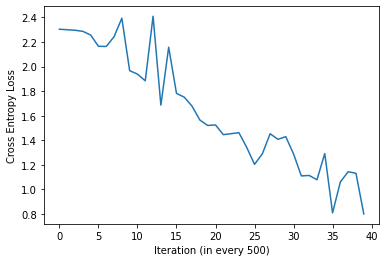

In [ ]:
#2
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#Hyperparameter Setting 3
*   No of hidden layers = 4
*   Hidden Nodes = 250
*   Iteration = 30000
*   Learning rate = 0.01
*   Batch size = 128
*   Number of epoch : 200
*   Activation Function : ReLU, ReLU6
*   Optimizer : SGD
*   Accuracy : 58.72%
*   Loss : 1.24

In [ ]:
#3
batch_size = 128
num_iters = 30500
input_dim = 28*28 
output_dim = 10
learning_rate = 0.01
num_hidden = 250  #number of hidden nodes
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# split data 20% for testing
test_size = int(0.2*len(dataset))
train_size = len(dataset)-test_size

train_data, test_data = torch.utils.data.random_split(dataset,[train_size,test_size])

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    shuffle =True )

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    shuffle = False)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:152
Test dataloader:38


In [ ]:
#3
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

200


In [ ]:
#3
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 250
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 250 --> 250
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 250 --> 250
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU6()

        ### 4th hidden layer: 250 --> 250
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU6()

        ### Output layer: 250 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ## Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ## Non-linearity in 4th hidden layer
        out = self.relu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


#3
'''
INSTANTIATE MODEL CLASS
'''
model = DeepNeuralNetworkModel(input_size=input_dim,
                                num_classes=output_dim,
                                num_hidden = num_hidden)

#To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=250, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=250, out_features=250, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=250, out_features=250, bias=True)
  (relu_3): ReLU6()
  (linear_4): Linear(in_features=250, out_features=250, bias=True)
  (relu_4): ReLU6()
  (linear_out): Linear(in_features=250, out_features=10, bias=True)
)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()


#3
iteration_loss = []
iter = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.302950382232666. Accuracy: 12.142416135007203
Iteration: 1000. Loss: 2.3013768196105957. Accuracy: 9.36406668038691
Iteration: 1500. Loss: 2.301032066345215. Accuracy: 10.084379501955135
Iteration: 2000. Loss: 2.301224946975708. Accuracy: 9.281745215064829
Iteration: 2500. Loss: 2.3007171154022217. Accuracy: 12.245317966659806
Iteration: 3000. Loss: 2.2995362281799316. Accuracy: 11.957192838032517
Iteration: 3500. Loss: 2.297257661819458. Accuracy: 12.018933937024078
Iteration: 4000. Loss: 2.2951273918151855. Accuracy: 10.022638402963572
Iteration: 4500. Loss: 2.296053171157837. Accuracy: 16.85532002469644
Iteration: 5000. Loss: 2.2958059310913086. Accuracy: 16.361391232763943
Iteration: 5500. Loss: 2.2911672592163086. Accuracy: 20.16875900391027
Iteration: 6000. Loss: 2.279437303543091. Accuracy: 20.82733072648693
Iteration: 6500. Loss: 2.2700464725494385. Accuracy: 20.662687795842768
Iteration: 7000. Loss: 2.2586262226104736. Accuracy: 17.740275776908828
Itera

[2.302950382232666, 2.3013768196105957, 2.301032066345215, 2.301224946975708, 2.3007171154022217, 2.2995362281799316, 2.297257661819458, 2.2951273918151855, 2.296053171157837, 2.2958059310913086, 2.2911672592163086, 2.279437303543091, 2.2700464725494385, 2.2586262226104736, 2.23067307472229, 2.1802051067352295, 2.2409133911132812, 2.19282603263855, 2.060162305831909, 2.1115188598632812, 2.0246527194976807, 2.0587103366851807, 2.062397003173828, 1.966172218322754, 2.0248751640319824, 2.0111095905303955, 1.7583235502243042, 1.7205560207366943, 1.8779624700546265, 1.9265098571777344, 1.5268760919570923, 1.7433394193649292, 1.576898217201233, 1.7171489000320435, 1.5792696475982666, 1.9282448291778564, 1.4596376419067383, 1.6253037452697754, 1.6230354309082031, 1.5292984247207642, 1.6436734199523926, 1.6761353015899658, 1.4307469129562378, 1.4722950458526611, 1.3662467002868652, 1.422434687614441, 1.4230917692184448, 1.339030146598816, 1.3323031663894653, 1.3117467164993286, 1.2162315845489

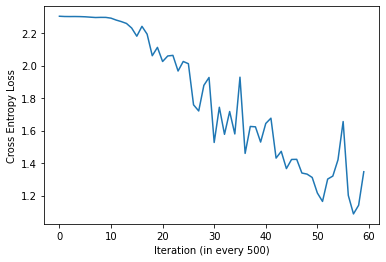

In [ ]:
#3
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#Hyperparameter Setting 4
*   No of hidden layers = 3
*   Hidden Nodes = 200
*   Iteration = 50000
*   Learning rate = 0.02
*   Batch size = 128
*   Number of epoch = 332
*   Activation Function : ReLU, ReLU6, LeakyReLU
*   Optimizer : SGD
*   Accuracy : 76.27%
*   Loss : 0.55

In [ ]:
#4
batch_size = 128
num_iters = 50500
input_dim = 28*28
output_dim = 10
learning_rate = 0.02
num_hidden = 200  #number of hidden nodes
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# split data 20% for testing
test_size = int(0.2*len(dataset))
train_size = len(dataset)-test_size

train_data, test_data = torch.utils.data.random_split(dataset,[train_size,test_size])

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    shuffle =True )

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    shuffle = False)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:152
Test dataloader:38


In [ ]:
#4
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

332


In [ ]:
#4
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 200
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 200 --> 200
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU6()

        ### 3rd hidden layer: 200 --> 200
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ## Non-linearity in 3rd hidden layer
        self.relu_3 = nn.LeakyReLU()

        ### Output layer: 200 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ## Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


#4
'''
INSTANTIATE MODEL CLASS
'''
model = DeepNeuralNetworkModel(input_size=input_dim,
                                num_classes=output_dim,
                                num_hidden = num_hidden)

#To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU6()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): LeakyReLU(negative_slope=0.01)
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()


#4
iteration_loss = []
iter = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.299863338470459. Accuracy: 9.960897303972011
Iteration: 1000. Loss: 2.298478603363037. Accuracy: 9.755093640666804
Iteration: 1500. Loss: 2.2924249172210693. Accuracy: 21.280098785758387
Iteration: 2000. Loss: 2.2795236110687256. Accuracy: 18.6046511627907
Iteration: 2500. Loss: 2.2162039279937744. Accuracy: 22.103313438979214
Iteration: 3000. Loss: 2.1663475036621094. Accuracy: 19.469026548672566
Iteration: 3500. Loss: 2.2100777626037598. Accuracy: 27.72175344721136
Iteration: 4000. Loss: 2.1714046001434326. Accuracy: 22.59724223091171
Iteration: 4500. Loss: 2.1961450576782227. Accuracy: 19.633669479316733
Iteration: 5000. Loss: 2.2009806632995605. Accuracy: 22.350277834945462
Iteration: 5500. Loss: 1.978650450706482. Accuracy: 30.870549495781024
Iteration: 6000. Loss: 1.9932019710540771. Accuracy: 35.89215888042807
Iteration: 6500. Loss: 1.9154692888259888. Accuracy: 34.94546202922412
Iteration: 7000. Loss: 1.8333368301391602. Accuracy: 32.55813953488372
Itera

[2.299863338470459, 2.298478603363037, 2.2924249172210693, 2.2795236110687256, 2.2162039279937744, 2.1663475036621094, 2.2100777626037598, 2.1714046001434326, 2.1961450576782227, 2.2009806632995605, 1.978650450706482, 1.9932019710540771, 1.9154692888259888, 1.8333368301391602, 1.772537350654602, 1.858469009399414, 1.564142107963562, 1.8858190774917603, 1.6742767095565796, 1.675761342048645, 1.4673223495483398, 1.4503040313720703, 1.5840981006622314, 1.738195776939392, 1.5073938369750977, 1.4198265075683594, 1.4571834802627563, 1.5784378051757812, 1.3420228958129883, 1.1989490985870361, 1.2846653461456299, 1.2748832702636719, 1.187929630279541, 1.2245161533355713, 1.2223366498947144, 0.8184236884117126, 1.2260855436325073, 0.9809764623641968, 1.0509451627731323, 0.9931465983390808, 0.9534193873405457, 0.8226305842399597, 1.0241285562515259, 0.6997678875923157, 0.7508785724639893, 0.670493483543396, 0.7358524203300476, 0.5452476739883423, 0.757193922996521, 0.7798745632171631, 0.68324685

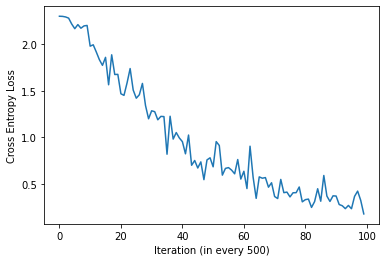

In [ ]:
#4
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()